In [11]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Power method problem

1. Implement the power method in Python. I've included my starter code below.
2. Sometimes you'll notice that the power method fails to converge to the correct solution. What is special about randomly-sampled matrices where this occurs? How does the direction of the starting vector affect the time it takes to reach a solution? 
2. Suppose that we interpret a given linear matrix $X$ as describing a discrete-time linear dynamical system, $\v{y}_{t+1} = X \v{y}_t$. What kind of dynamics does the power method exhibit? What about the pathological cases you discussed in the previous solution?
5. The power method represents a basic optimization problem, where we are searching for a convergent solution. We saw that our method occasionally fails to find the correct solution. One way to improve our optimization would be to add a momentum term of the form $$\v{y}_t \leftarrow \gamma \v{y}_{t - 1} + (1 - \gamma) \dfrac{X \v{y}_{t - 1}} { \left| X \v{y}_{t - 1} \right|} .$$ Where $\gamma \in (0, 1]$. How would you modify your implementation of the power method, in order to allow momentum? What kinds of pathological dynamics would the momentum term help us avoid?
6. Similar to the momentum term, there is also a way to add damping to the update rule. What kinds of dynamics would that help us avoid?

## 1. 

In [53]:
import warnings
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
    
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
        stored_eigenvectors (list): If store_intermediate_results is active, a list of
            eigenvectors at each iteration
    """
    
    def __init__(self, 
        max_iter=1000, 
        tolerance=1e-5, 
        gamma=0.0,
        random_state=None, 
        store_intermediate_results=False
    ):
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        np.random.seed(random_state)
        self.store_intermediate_results = store_intermediate_results 
        
        if store_intermediate_results is True:
            self.intermediate_results = []
            self.stored_eigenvalues = []
            self.stored_eigenvectors = []
    
    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """

        size = len(A)
 
        temp = np.random.rand(size)
        v_old = temp / np.linalg.norm(temp)
        v_new = np.matmul(A, v_old)

        while np.max( np.abs( np.subtract(v_new, v_old) ) ) > self.tolerance:
            
            v_old = v_new
            v_new = np.matmul(A, v_old)

            v_new = v_new / np.linalg.norm(v_new) 
            
            eigenvalue = np.dot(v_new, np.matmul(A, v_new)) / np.dot(v_new, v_new)

            if self.store_intermediate_results is True:
                self.stored_eigenvectors.append(v_new)
                self.stored_eigenvalues.append(eigenvalue)

Power method solution: [0.05189782411998271, 0.051793669980120645, 0.05181231768519418, 0.05180968804135193, 0.05181015949630585, 0.051810098481418425]
Numpy solution: 0.05181010967965877


Text(0, 0.5, 'Power method eigenvector')

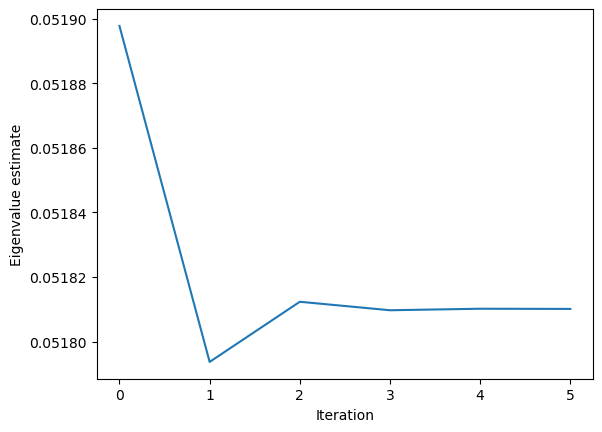

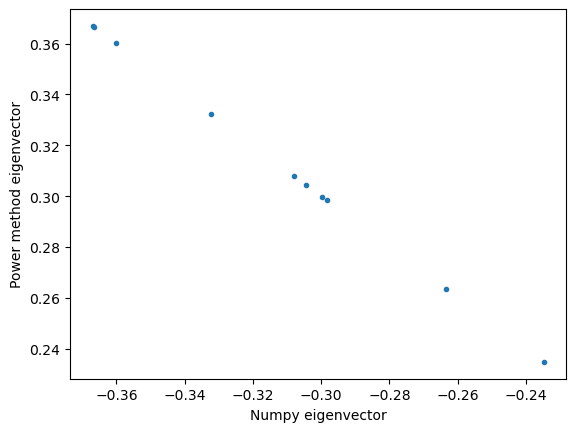

In [54]:
## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])
    
#  If I sample my matrices from a normal distribution these matrices fail to converge
mm = np.random.random(size=(10, 10)) / 100
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.stored_eigenvalues}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.stored_eigenvectors[-1], '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

## 2.

There's a couple issues that could happen based on our matrix. Since the power method converges to the largest eigenvalue, we need this eigenvalue to be helpful: if it's incredibly close to being zero then it could take a very long time to converge to a reasonable guess and even then that guess could be pretty bad. It would also be helpful if the eigenvalue wasn't too large as this could again lead to the method producing an eigenvector that's very large. We also rely on our initial guess vector to have some component pointing in the direction of the eigenvector associated with the largest eigenvalue, if this isn't true and we're just initially pointing in a completely different direction then the power method will converge to the second largest eigenvalue (again dependent on if we have a component in this direction.) 

## 3.

If I understand the question correctly, I'd say the power method acts as a sort of rotation plus stretch/shrink, since it slowly moves a vector towards the eigenvector with the largest magnitude eigenvalue. This involves rotating to this direction and potentially changing the magnitude of the original vector that was used as a starting point. 

## 4.

To add the momentum term you just need to edit the line that computes the new vector. I'd also likely add $\gamma$ to the definition of self, but everything else can stay the same. 

## 5.

# Unsupervised learning problem

1. Explore the included von Karman datasets using the code below. What symmetries are present in the data? Do any symmetries change as we increase the Reynolds number?
2. Implement Principal Component Analysis in Python. I have included my outline code below; we are going to use multiple inheritence in order to make our implementation compatible with standard conventions for machine learning in Python. You can use numpy's built-in eigensystem solvers `np.linalg.eig` and `np.linalg.eigh`
3.  Plot the eigenvalues of the data covariance matrix in descending order. What does this tell us about the effective dimensionality, and thus optimal number of features, to use to represent the von Karman dataset?
4. Try re-running your analysis using datasets from different Reynolds numbers. How does the effective dimensionality of the problem change as Reynolds number increases?
5. For this problem, the principal components often appear in pairs. Can you think of a reason for this?
6. What happens if we don't subtract the feature-wise mean before calculating PCA?
7. In Fourier analysis, we project a function onto linear combination of trigonometric basis functions. How is this related to principal component analysis?


## 1. 

In [42]:
Re = 300 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"/Users/swilliamson/Documents/GitHub/comp_physics_sw/hw/resources/vortex_street_data/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

Velocity field data has shape: (3000, 256, 128, 2)


In [43]:
## Make an interactive video (optional; requires ipywidgets and has some RAM overhead)

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(vort_field) - 1, 1, layout=Layout(width='500px'))
)

When the Reynold's number is low (so the fluid is more viscous), after splitting around the cylinder the fluid nicely recombines behind it, giving us symmetry from left to right. But as we increase the Reynold's number (make the fluid more fluid-y) this symmetry breaks, it seems to happen somewhere between $R = 600$ and $R = 900$. At $R = 600$ we still almost have that left-right symmetry, but by $900$ the vortices created by the cylinder don't seem to behave in a periodic way. 

## 2. 

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# We are going to use class inheritance to define our object. The two base classes from
# scikit-learn represent placeholder objects for working with datasets. They include 
# many generic methods, like fetching parameters, getting the data shape, etc.
# 
# By inheriting from these classes, we ensure that our object will have access to these
# functions, even though we don't have to define them ourselves
class PrincipalComponents(BaseEstimator, TransformerMixin):
    """
    A class for performing principal component analysis on a dataset.
    """

    def __init__(self, random_state=None):
        self.random_state = random_state
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        """
        Fit the PCA model to the data X. Store the eigenvectors in the attribute
        self.components_ and the eigenvalues in the attribute self.singular_values_

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be fit.
        
        Returns:
            self (PrincipalComponents): The fitted object.
        """

        ########## YOUR CODE HERE ##########

        Xc = X - np.mean(X, axis=0)

        Epsilon = (1 / len(Xc)) * (np.transpose(Xc) @ Xc)

        eig_values, eig_vectors = np.linalg.eigh(Epsilon) 
        eig_vectors = np.transpose(eig_vectors)

        index = eig_values.argsort()[::-1]   
        eig_values = eig_values[index]
        eig_vectors = eig_vectors[index]

        self.components_ = eig_vectors
        self.singular_values_ = eig_values 

        return self

    def transform(self, X):
        """
        Transform the data X into the new basis using the PCA components
        """

        Xc = X - np.mean(X, axis=0)
        return Xc.dot(np.transpose(self.components_))

    def inverse_transform(self, X):
        """
        Transform from principal components space back to the original space
        """
        
        X = X.dot(self.components_) + np.mean(X, axis=0)
        return X 



## 3. 

Text(0.5, 0, 'Eigenvalue rank')

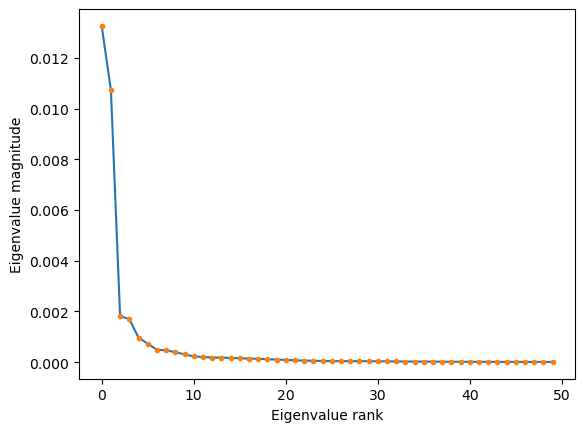

In [45]:
# Load William's solutions
# from solutions.pca import PrincipalComponents

data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')
plt.ylabel("Eigenvalue magnitude")
plt.xlabel("Eigenvalue rank")

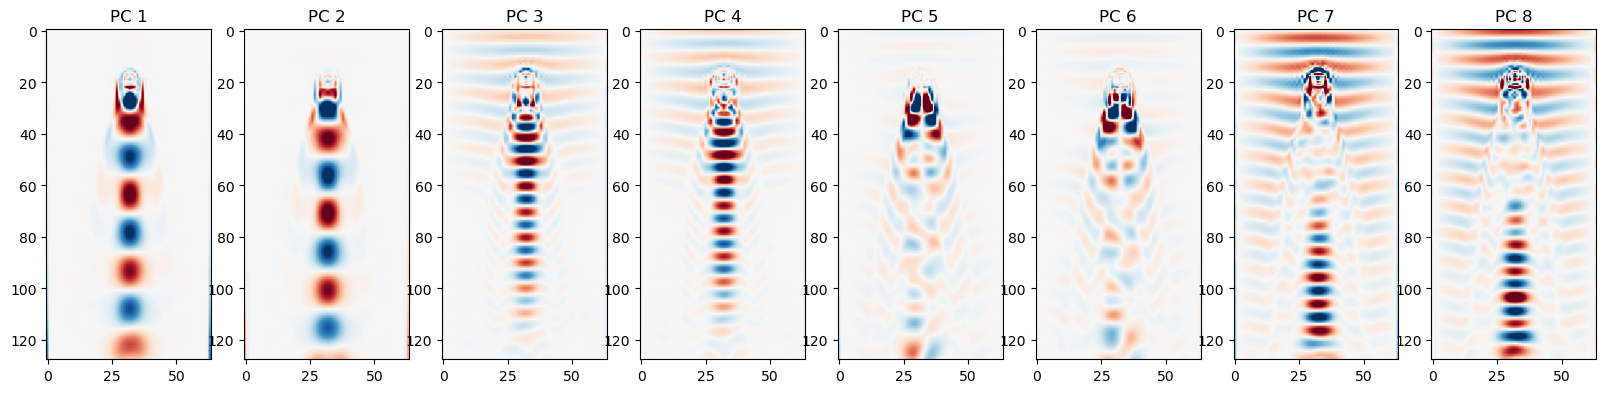

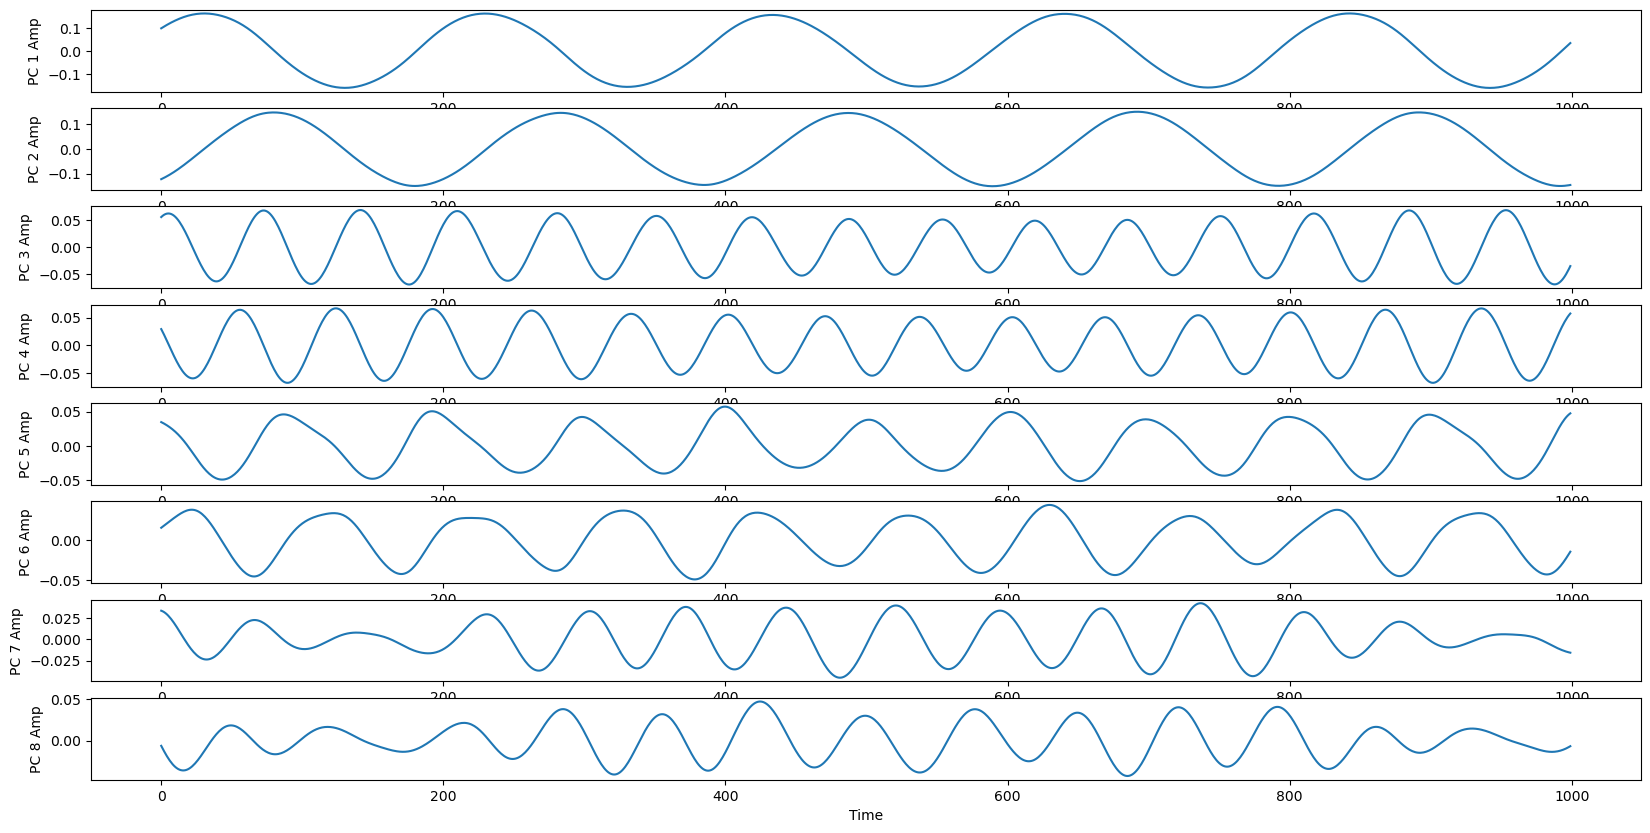

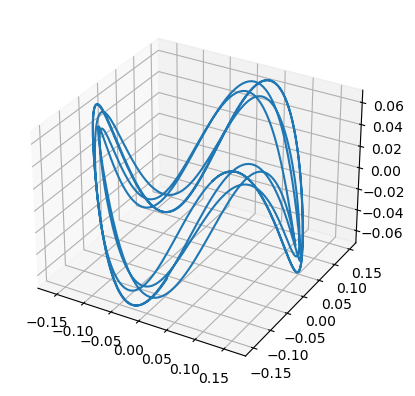

In [46]:
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(1, 8, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])

As discussed in class, when we look at the above eigenvalue plot we can see how many eigenvalues are large relative to "the rest," where the rest is just everything that tends towards zero. If the first say, 5 are large relative to everything else which is roughly zero, then we only really need to consider the first five eigenvectors. This also decides on the dimensionality of the problem, five eigenvectors means five independent directions, and so five dimensions. 

## 4. 

When we increase the Reynold's number the effective dimensionality increases -- more of our eigenvalues (and thus eigenvectors) seem to become relevant to the analysis, increasing the number of principal components we could consider. By relevant I mean that our plot of rank versus magnitude becomes less steep as we increase the Reynold's number, so theoretically more of the initial eigenvalues would be useful.  

## 5. 

I would guess they appear in pairs due to some sort of parity in the model. When I look at the plots of the principal components it sort of looks like within a pair the red and blue are flipped one to the other. The flipping is more apparent for low Reynold's numbers, where if you flip along a vertical axis you get the second PC component in the pair, and harder to see in higher Reynold's numbers. At larger numbers it seems like the it's less of a vertical flip and more of a switching of red and blue.

## 6. 

Let's modify the code and look at what happens to the principal components! 

In [50]:
Re = 300 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"/Users/swilliamson/Documents/GitHub/comp_physics_sw/hw/resources/vortex_street_data/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

Velocity field data has shape: (3000, 256, 128, 2)


In [51]:
# incorrect code, doesn't subtract off the mean. 

from sklearn.base import BaseEstimator, TransformerMixin

# We are going to use class inheritance to define our object. The two base classes from
# scikit-learn represent placeholder objects for working with datasets. They include 
# many generic methods, like fetching parameters, getting the data shape, etc.
# 
# By inheriting from these classes, we ensure that our object will have access to these
# functions, even though we don't have to define them ourselves
class PrincipalComponents(BaseEstimator, TransformerMixin):
    """
    A class for performing principal component analysis on a dataset.
    """

    def __init__(self, random_state=None):
        self.random_state = random_state
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        """
        Fit the PCA model to the data X. Store the eigenvectors in the attribute
        self.components_ and the eigenvalues in the attribute self.singular_values_

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be fit.
        
        Returns:
            self (PrincipalComponents): The fitted object.
        """

        ########## YOUR CODE HERE ##########

        Xc = X 

        Epsilon = (1 / len(Xc)) * (np.transpose(Xc) @ Xc)

        eig_values, eig_vectors = np.linalg.eigh(Epsilon) 
        eig_vectors = np.transpose(eig_vectors)

        index = eig_values.argsort()[::-1]   
        eig_values = eig_values[index]
        eig_vectors = eig_vectors[index]

        self.components_ = eig_vectors
        self.singular_values_ = eig_values 

        return self

    def transform(self, X):
        """
        Transform the data X into the new basis using the PCA components
        """

        Xc = X 
        return Xc.dot(np.transpose(self.components_))

    def inverse_transform(self, X):
        """
        Transform from principal components space back to the original space
        """
        
        X = X.dot(self.components_) 
        return X 


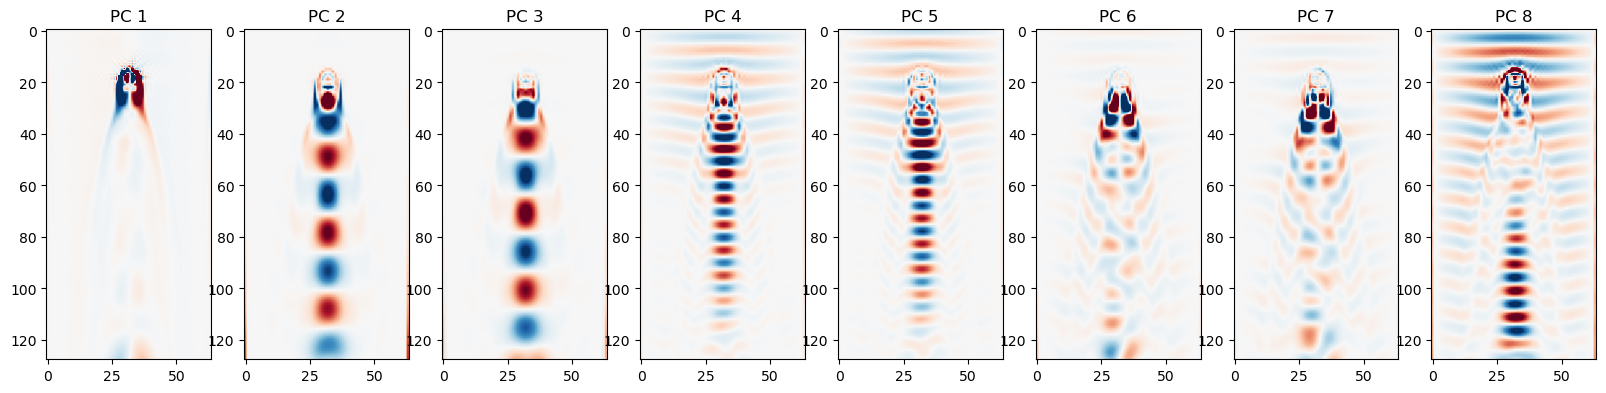

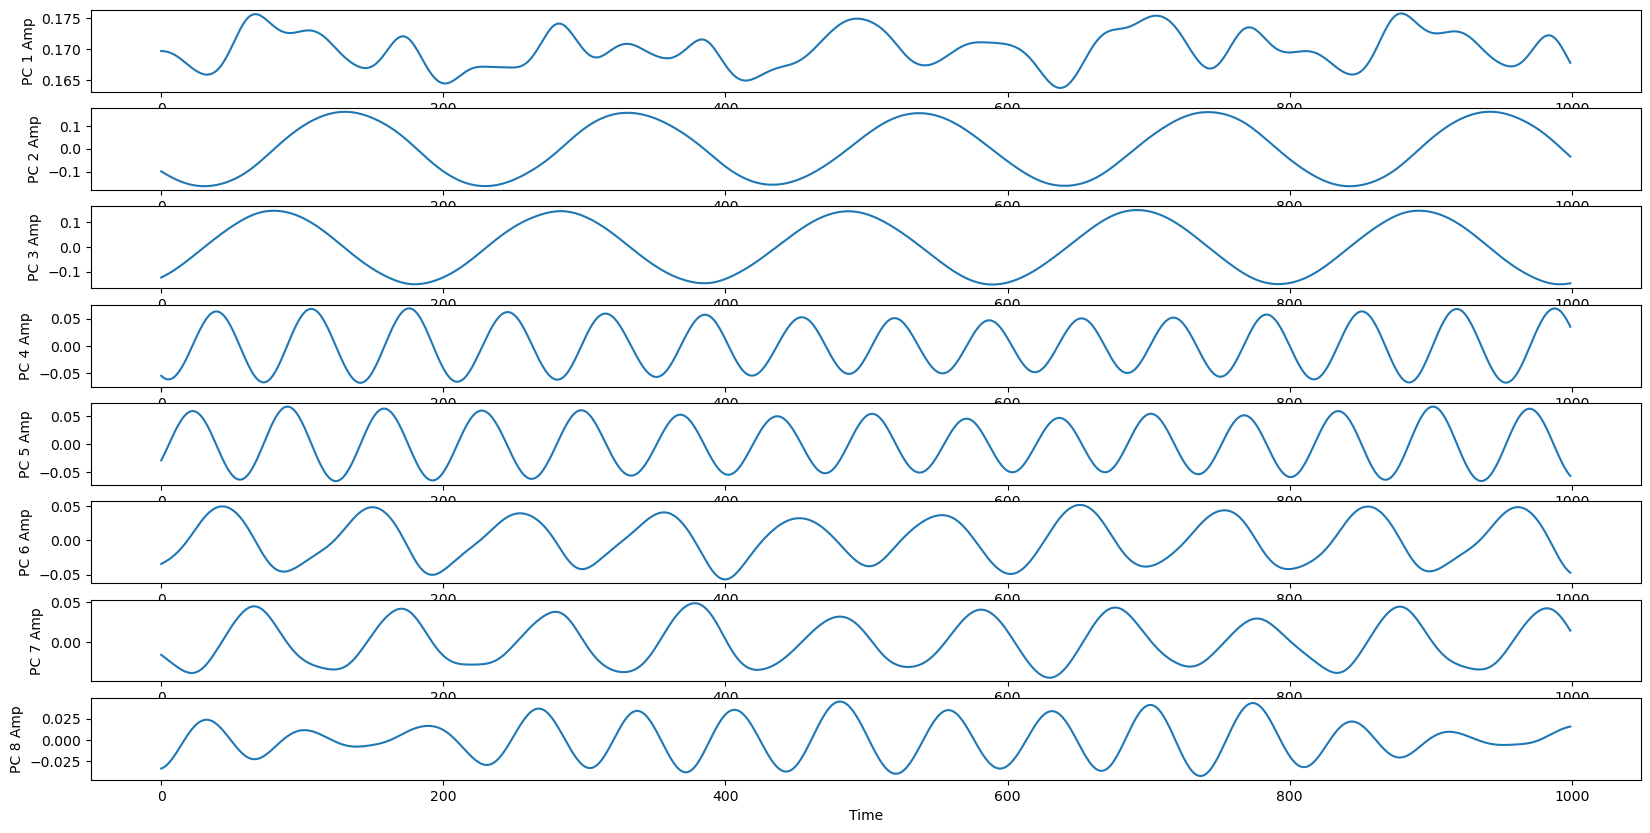

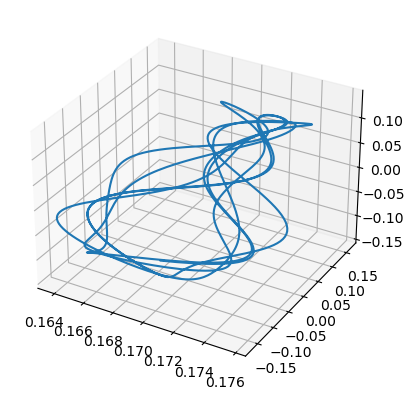

In [52]:
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(1, 8, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])

In terms of the plots of the PC components, it looks like they got shifted by one. We now have a new PC 1 that didn't appear when we subtracted off the mean, so I'm guessing it has something to do with the actual mean of our data. What really changed is the plot of the transformed components of th data. Especially in the case of the low Reynold's number, it went from being something relatively clear, to a more chaotic path. 

## 7.

The trigonometric basis we project onto with a Fourier transform is exactly the same idea as principal component analysis: in both cases we're representing something (a function, a solution to an ODE, etc.) as a sum over basis functions of a Hilbert space, and the number of basis functions we keep changes the solution minutely. With the infinite sum after using a Fourier transform, after some point the additional terms don't provide that much more information, and so we truncate it as an approximation. We're doing the same thing here with PCA, we're saying we only really need the first few eigenvectors (basis functions) to get the majority of the helpful information. 